<a href="https://colab.research.google.com/github/lamaachi/MyDataScience_Projects/blob/main/Jester_Autoencodeur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt


In [ ]:
# Configuration pour assurer la reproductibilité
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
# Chargement des datasets Jester
items_df = pd.read_csv("jester_items.csv")
ratings_df = pd.read_csv("jester_ratings.csv")
print("Datasets Jester chargés avec succès.")



Datasets Jester chargés avec succès.


# 2. Prétraitement des Données

In [ ]:
# Création de la matrice utilisateur-blague (pivot table)
user_item_matrix = ratings_df.pivot_table(index='userId', columns='jokeId', values='rating').fillna(0)
print("Matrice utilisateur-blague (avant normalisation):")
print(user_item_matrix.head())

Matrice utilisateur-blague (avant normalisation):
jokeId    5      7      8      13     15     16     17     18     19     20   \
userId                                                                         
1       0.219 -9.281 -9.281 -6.781  0.875 -9.656 -9.031 -7.469 -8.719 -9.156   
2      -9.688  9.938  9.531  9.938  0.406  3.719  9.656 -2.688 -9.562 -9.125   
3      -9.844 -9.844 -7.219 -2.031 -9.938 -9.969 -9.875 -9.812 -9.781 -6.844   
4      -5.812 -4.500 -4.906  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
5       6.906  4.750 -5.906 -0.406 -4.031  3.875  6.219  5.656  6.094  5.406   

jokeId  ...  141  142  143  144  145  146  147  148  149  150  
userId  ...                                                    
1       ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2       ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3       ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4       ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5    

In [ ]:
# Normalisation des ratings entre 0 et 1 (pour améliorer la performance du modèle)
scaler = MinMaxScaler()
normalized_ratings = scaler.fit_transform(user_item_matrix.values)
print("\nDonnées normalisées:")
print(normalized_ratings)


Données normalisées:
[[0.5117432  0.03595    0.03595    ... 0.5        0.5        0.5       ]
 [0.01562422 0.9969     0.97655    ... 0.5        0.5        0.5       ]
 [0.00781211 0.0078     0.13905    ... 0.5        0.5        0.5       ]
 ...
 [0.5007762  0.3875     0.53595    ... 0.25155    0.5        0.5       ]
 [0.5007762  0.23125    0.9469     ... 0.9031     0.2531     0.6906    ]
 [0.5007762  0.2219     0.2344     ... 0.5        0.5        0.66095   ]]


In [ ]:
# Division en ensembles d'entraînement et de test
train_data, test_data = train_test_split(normalized_ratings, test_size=0.2, random_state=42)
print(f"\nShape train : {train_data.shape} Shape test : {test_data.shape}")


Shape train : (13768, 140) Shape test : (3442, 140)


In [ ]:
# Conversion des ensembles en matrices (les données sont déjà sous forme matricielle)
train_matrix = np.array(train_data)
test_matrix = np.array(test_data)
print(f"Shape train_matrix : {train_matrix.shape} Shape test_matrix : {test_matrix.shape}")

Shape train_matrix : (13768, 140) Shape test_matrix : (3442, 140)


In [ ]:
input_dim = train_matrix.shape[1]
encoding_dim = 32  # Taille de la couche d'encodage (bottleneck) - à ajuster

# Définition de l'encodeur
encoder = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(encoding_dim, activation='relu')
])

In [ ]:
# Définition du décodeur
decoder = keras.Sequential([
    layers.Input(shape=(encoding_dim,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(input_dim, activation='sigmoid')  # Utiliser sigmoid pour une sortie normalisée entre 0 et 1
])

In [ ]:
# Construction de l'autoencodeur
autoencoder = keras.Sequential([encoder, decoder])

In [ ]:
# Compilation du modèle
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

# 4. Entraînement du Modèle

In [ ]:
epochs = 50
batch_size = 256

history = autoencoder.fit(
    train_matrix, train_matrix,
    epochs=epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_data=(test_matrix, test_matrix),
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - val_loss: 0.0062
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0060 - val_loss: 0.0062
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0059 - val_loss: 0.0062
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0059 - val_loss: 0.0062
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0059 - val_loss: 0.0062
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0059 - val_loss: 0.0062
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0058 - val_loss: 0.0062
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0060 - val_loss: 0.0062
Epoch 9/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0059 - val_loss: 0.0062
Epoch 10/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0058 - val_loss: 0.0062
Epoch 11/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0058 - val_loss: 0.0062
Epoch 12/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0059 - val_lo

# 5. Évaluation du Modèle

In [ ]:
loss = autoencoder.evaluate(test_matrix, test_matrix)
print(f"Erreur quadratique moyenne sur les données de test : {loss}")

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0061
Erreur quadratique moyenne sur les données de test : 0.005940464325249195


# Afficher la courbe d'entrainement

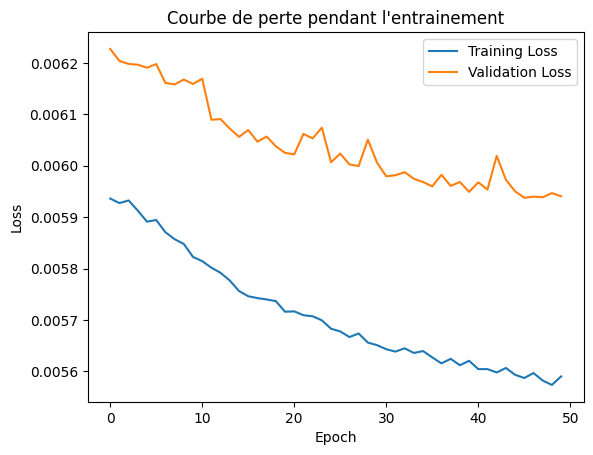

In [ ]:
# Afficher la perte d'apprentissage
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte pendant l\'entrainement')
plt.legend()
plt.show()

# 6. Résultats

In [ ]:
# Utilisation de l'encodeur pour obtenir les représentations encodées
encoded_representations = encoder.predict(normalized_ratings)
# Convert user_item_matrix into a NumPy array
user_item_matrix_array = user_item_matrix.values


def recommend_jokes(user_id, num_recommendations=5):
    user_ratings = normalized_ratings[user_id] #Ratings normalisés
    encoded_user = encoded_representations[user_id] # Représentation encodée de l'utilisateur
    decoded_ratings = decoder.predict(encoded_user.reshape(1, -1))  # Prédiction des évaluations
    decoded_ratings = decoded_ratings.flatten()

    # On s'intéresse seulement aux blagues que l'utilisateur n'a pas évaluées (valeurs 0 dans user_ratings)
    unrated_jokes = np.where(user_item_matrix_array[user_id] == 0)[0]
    # Prédictions pour les blagues non évaluées
    unrated_predictions = decoded_ratings[unrated_jokes]

    # Récupérer les indices des blagues les mieux notées
    top_indices = np.argsort(unrated_predictions)[::-1][:num_recommendations]
    # Les indices des blagues à recommander
    recommended_jokes_ids = unrated_jokes[top_indices]

    # Récupérer les textes des blagues recommandées
    recommended_jokes_texts = items_df[items_df['jokeId'].isin(user_item_matrix.columns[recommended_jokes_ids])]['jokeText'].tolist()

    print(f"Recommandations pour l'utilisateur {user_id} :")
    print(f"Indices des blagues recommandées: {recommended_jokes_ids}")
    print(f"Prédictions de ratings : {unrated_predictions[top_indices]}")
    print(f"Textes des blagues recommandées :")
    for text in recommended_jokes_texts:
        print(f" - {text}")



538/538 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [ ]:
# Exemple de recommandation pour l'utilisateur 0
recommend_jokes(user_id=0, num_recommendations=5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Recommandations pour l'utilisateur 0 :
Indices des blagues recommandées: [ 45 106 137 117 103]
Prédictions de ratings : [0.753      0.7004552  0.6923131  0.6888237  0.67283934]
Textes des blagues recommandées :
 - A man and Cindy Crawford get stranded on a desert island.  After a couple
of days they fall in love and start sleeping together.  Time pass the
man seems frustrated, Cindy asks if there is anything she can do?  He
says there is one thing, "Could you put on this baseball cap and go to
the other side of the island and answer me when I call you Bob?"  She
agrees.  Next day he is walking on the other side of the island, runs
into her and says "Hi Bob!"  
She says "Hello, what's up?"  
He replies: "Bob you won't believe it: I've been sleeping with Cindy
Crawford for the past two weeks!!!!"

 - Sherlock Holmes and Dr. Watson go on a camping trip, set up their tent, and fall asleep. Some hours later, Holmes wakes his faithful friend. "Watson, lo